In [1]:
from SPCCT_4D import Sample, Timepoint
s1 = Sample(1)
s2 = Sample(2)

c:\Users\Chris\OneDrive\2023\BME_M2\STAGE\Thesis\Scripts_and_venv\internship_M2\SPCCT_4D.py:24: SyntaxWarning: invalid escape sequence '\c'
  base_path = f"D:\copyRaw\Rabbit_AGUIX_{rabbit_id}"


Available directories:
0: 2021_01_20.4511.400.2023_09_30.Rabbit_Aguix_4511_b00000
1: 2021_01_20.4511.500.2023_09_30.Rabbit_Aguix_4511_b00001
2: 2021_01_20.4511.600.2023_09_30.Rabbit_Aguix_4511_b00002
3: 2021_01_20.4511.700.2023_09_30.Rabbit_Aguix_4511_b00003
File 0 total DICOM files found: 480
File 0 total DICOM files found: 480
File 1 total DICOM files found: 480
File 1 total DICOM files found: 480
File 2 total DICOM files found: 480
File 2 total DICOM files found: 480
File 3 total DICOM files found: 480
File 3 total DICOM files found: 480
Available directories:
0: 2021_01_20.4511.300.2023_02_07.Rabbit_Aguix_4511_a00000
File 0 total DICOM files found: 480
File 0 total DICOM files found: 480


(512, 512, 480)


(-0.5, 479.5, 511.5, -0.5)

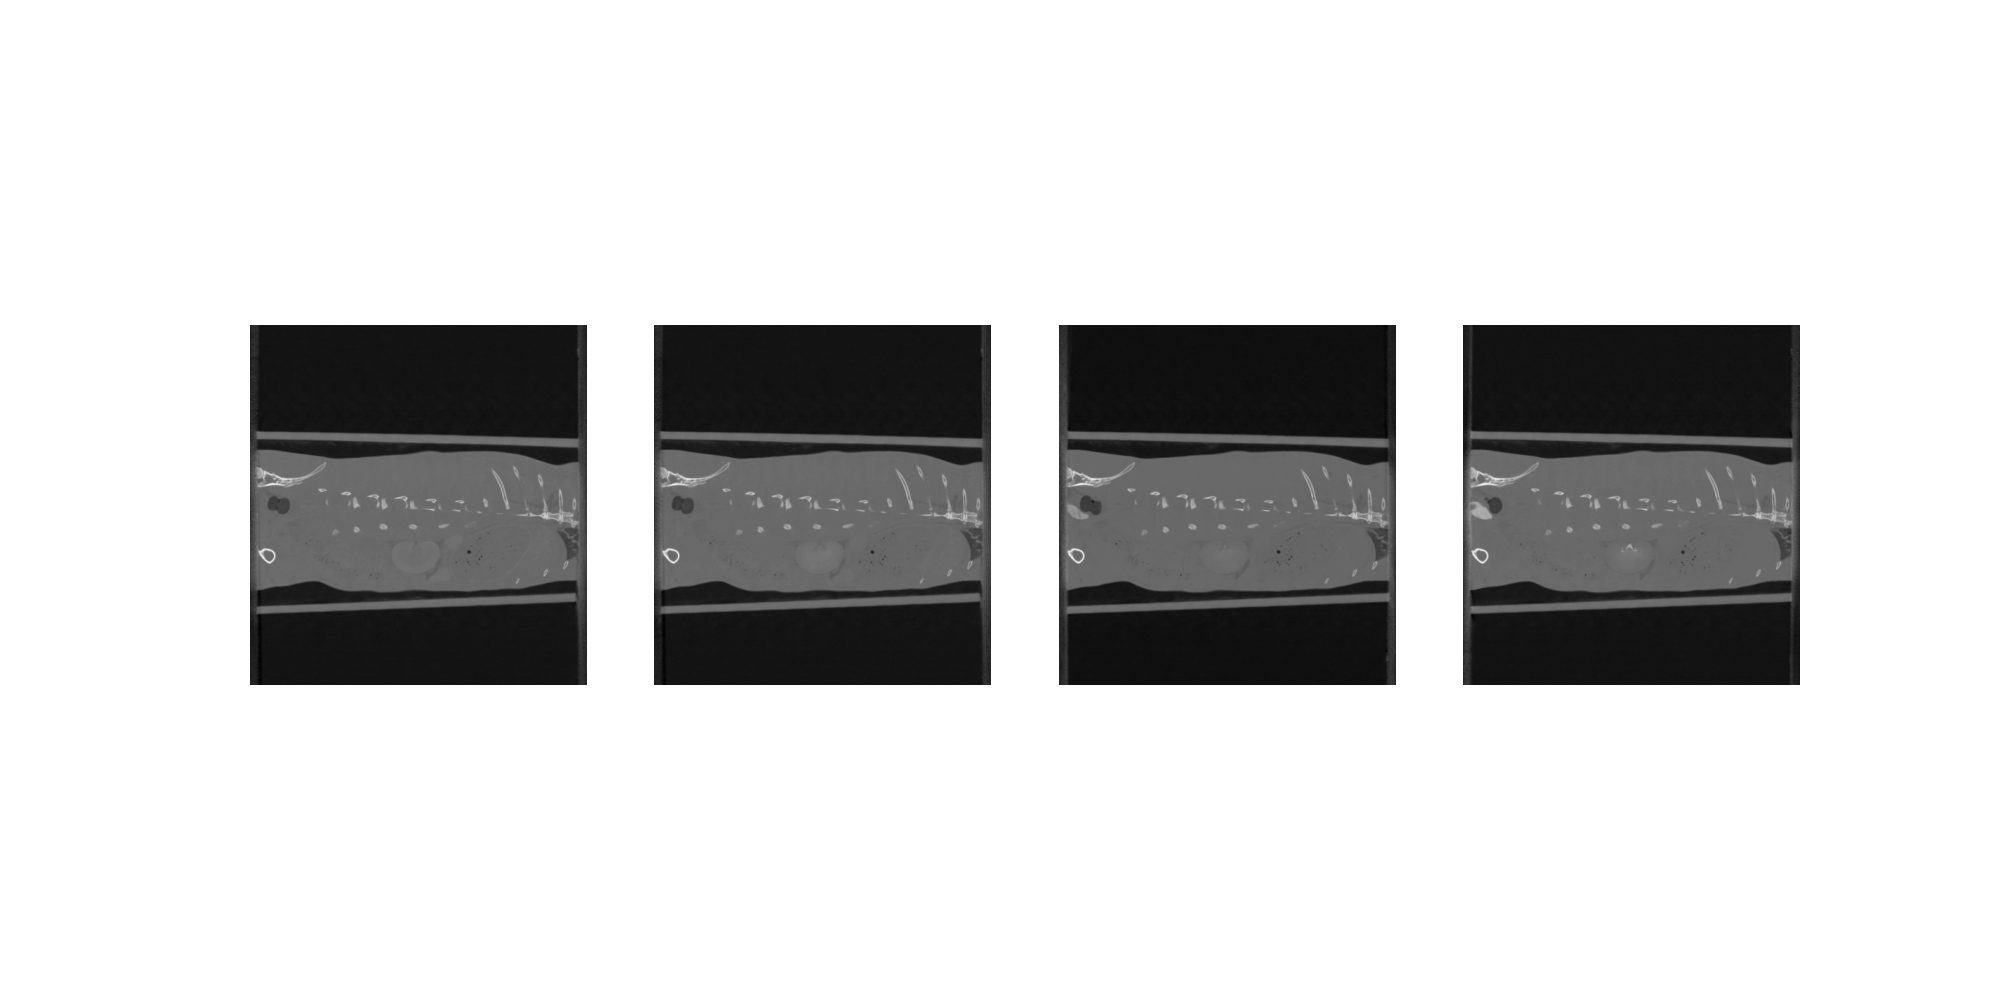

In [6]:
print(s1.acquisition[0].conventional.shape)

import matplotlib.pyplot as plt
n = 300

plt.figure(figsize=(20, 10))
plt.subplot(1,4,1)
plt.imshow(s1.acquisition[0].conventional[n,:,:], cmap = 'gray')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(s1.acquisition[1].conventional[n,:,:], cmap = 'gray')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(s1.acquisition[2].conventional[n,:,:], cmap = 'gray')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(s1.acquisition[3].conventional[n,:,:], cmap = 'gray')
plt.axis('off')

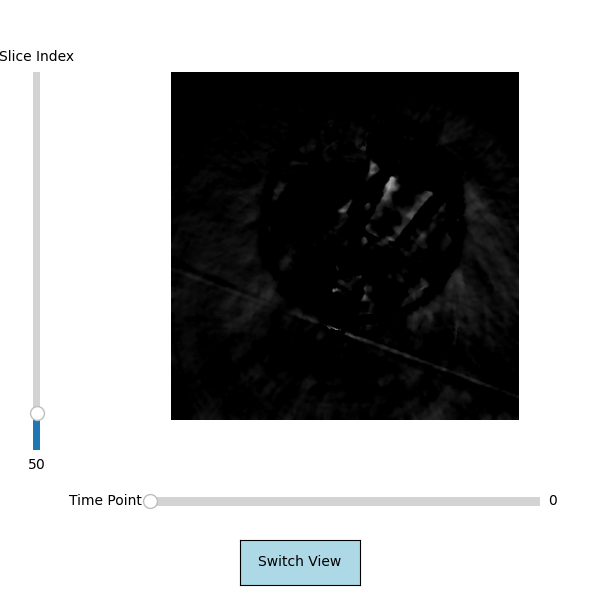

In [10]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

# Initial settings based on your preloaded data in s1
init_time_point = 0  # Initial time point
init_slice_index = 50  # Ensure this is within the bounds of your data

fig, ax = plt.subplots(figsize=(6, 6))
plt.subplots_adjust(left=0.25, bottom=0.3)

# Start by displaying 'kedge' images
image_type = 'kedge'  # Toggle between 'kedge' and 'conventional' with the button
# Display the initial image from the selected type for the initial time point and slice index
image_display = ax.imshow(getattr(s1.acquisition[init_time_point], image_type)[:, :, init_slice_index], cmap='gray')
ax.axis('off')  # Hide the axis for a cleaner look

# Slider for selecting the time point
ax_time = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor='lightgray')
time_slider = Slider(ax_time, 'Time Point', 0, len(s1.acquisition)-1, valinit=init_time_point, valstep=1)

# Slider for selecting the slice index, ensuring the slice index is within bounds for both image types
ax_slice = plt.axes([0.05, 0.25, 0.0225, 0.63], facecolor='lightgray')
slice_slider = Slider(ax_slice, 'Slice Index', 0, getattr(s1.acquisition[0], image_type).shape[0]-1, valinit=init_slice_index, valstep=1, orientation='vertical')

# Button for switching between 'kedge' and 'conventional' images
ax_button = plt.axes([0.4, 0.025, 0.2, 0.075])
button = Button(ax_button, 'Switch View', color='lightblue', hovercolor='0.975')

def update(val):
    global image_type
    time_point = int(time_slider.val)
    slice_index = int(slice_slider.val)
    new_image = getattr(s1.acquisition[time_point], image_type)[:, :, slice_index]
    
    # Apply windowing or normalization here if needed
    # new_image = apply_window(new_image, window_center, window_width)
    
    image_display.set_data(new_image)
    image_display.set_clim(vmin=new_image.min(), vmax=new_image.max())  # Adjust display range
    fig.canvas.draw_idle()


def switch_image_type(event):
    global image_type
    image_type = 'conventional' if image_type == 'kedge' else 'kedge'  # Toggle between image types
    slice_slider.valmax = getattr(s1.acquisition[int(time_slider.val)], image_type).shape[0]-1  # Adjust the max slice index if needed
    update(None)  # Update the display to reflect the change

time_slider.on_changed(update)
slice_slider.on_changed(update)
button.on_clicked(switch_image_type)

plt.show()
